In [118]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model, load_model

In [119]:
pretrained_model = load_model('model.h5')


In [120]:
for layer in pretrained_model.layers:
    layer.trainable = False


In [121]:
x = Flatten()(pretrained_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

In [122]:
model = Model(inputs=pretrained_model.input, outputs=predictions)

In [123]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [124]:
from tqdm import tqdm

from keras.utils.np_utils import to_categorical
import os
import cv2

In [125]:
dir = 'data' 


# Features and Labels
ft = []
lb = []
labels = {}
determine_label = ['art', 'beauty', 'Chatting', 'cooking', 'education', 'gaming', 'music', 'news', 'others', 'sports']
r=0
# Extracting label string and index
for i, k in enumerate(os.listdir(dir)) :
    if k in determine_label:
        labels[k] = r
        r+=1
# Appending features and labels
for i in determine_label:
    subdir = os.path.join(dir, i)
    for j in tqdm(os.listdir(subdir)):
        im =cv2.imread(os.path.join(subdir, j), 0) 
        im =cv2.resize(im,(70,70))
        ft.append(im)
        lb.append(labels[i])

100%|██████████| 402/402 [00:40<00:00,  9.94it/s]


In [126]:
import numpy as np

In [127]:
ft = np.array(ft)
lb = np.array(lb).reshape(len(ft),1)
ft.shape, lb.shape

((7090, 70, 70), (7090, 1))

In [128]:
X = ft.reshape(-1,70,70,1)
X.shape

(7090, 70, 70, 1)

In [129]:
Y= to_categorical(lb)
Y.shape

(7090, 10)

In [130]:
X =X/255.0
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5317, 70, 70, 1), (1773, 70, 70, 1), (5317, 10), (1773, 10))

In [131]:
hist = model.fit(x_train,y_train, epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
167/167 [==============================] - 54s 295ms/step - loss: 1.1602 - accuracy: 0.7459 - val_loss: 0.5110 - val_accuracy: 0.8804
Epoch 2/5
167/167 [==============================] - 52s 311ms/step - loss: 0.5980 - accuracy: 0.8337 - val_loss: 0.4078 - val_accuracy: 0.8928
Epoch 3/5
167/167 [==============================] - 50s 299ms/step - loss: 0.5874 - accuracy: 0.8330 - val_loss: 0.3946 - val_accuracy: 0.8911
Epoch 4/5
167/167 [==============================] - 40s 238ms/step - loss: 0.5783 - accuracy: 0.8343 - val_loss: 0.3904 - val_accuracy: 0.8923
Epoch 5/5
167/167 [==============================] - 40s 239ms/step - loss: 0.5736 - accuracy: 0.8309 - val_loss: 0.3885 - val_accuracy: 0.8928


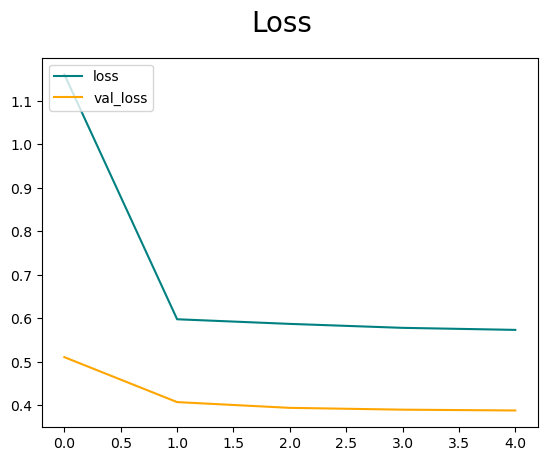

In [146]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

(1, 70, 70, 1)

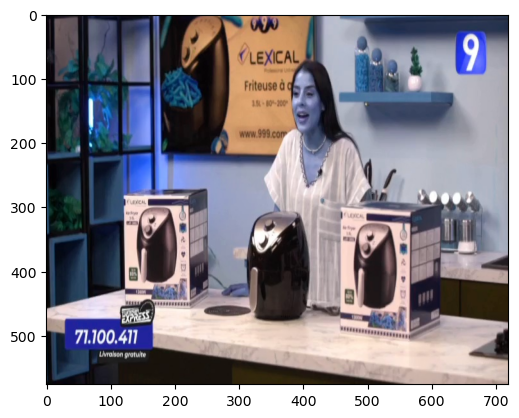

In [141]:
img = cv2.imread('x.jpg')
plt.imshow(img)
img =cv2.resize(img, (70, 70))
img= np.array(img)
img = np.mean(img, axis=-1, keepdims=True)
img=img.reshape(-1,70,70,1)
img=img/255.0
img.shape


In [142]:
labels = {'art': 0, 'beauty': 1,'Chatting': 2, 'cooking': 3, 'education': 4, 'gaming': 5, 'music':6, 'news':7, 'others':8,'sports':9}

rev_labels = []
for i,k in enumerate(labels.keys()):
    rev_labels.append(k)
rev_labels


['art',
 'beauty',
 'Chatting',
 'cooking',
 'education',
 'gaming',
 'music',
 'news',
 'others',
 'sports']

In [145]:
pred = model.predict(img)
rev_labels[np.argmax(pred)]
predictions_percentages = np.round(pred*100, decimals=2)

# Print the percentage of predictions for each class
for i, label in enumerate(rev_labels):
    print('{}: {:.2f}%'.format(label, pred[0][i]))

1/1 [==============================] - 0s 56ms/step
art: 0.10%
beauty: 0.03%
Chatting: 0.02%
cooking: 0.30%
education: 0.06%
gaming: 0.09%
music: 0.07%
news: 0.16%
others: 0.00%
sports: 0.17%


In [132]:
preds = model.evaluate(x_test,y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

56/56 [==============================] - 6s 111ms/step - loss: 0.3885 - accuracy: 0.8928
Loss = 0.3885469138622284
Test Accuracy = 0.8928369879722595


Image number :  1379
1/1 [==============================] - 0s 379ms/step
sports


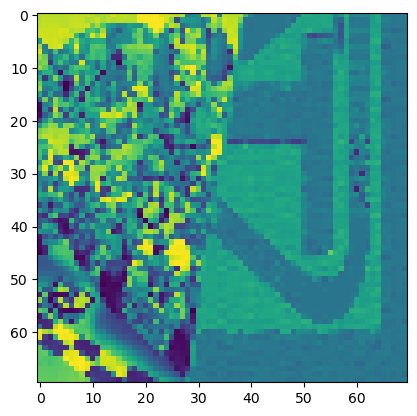

Image number :  199
1/1 [==============================] - 0s 83ms/step
cooking


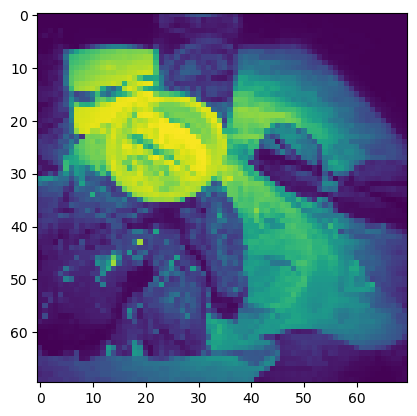

Image number :  1449
1/1 [==============================] - 0s 88ms/step
education


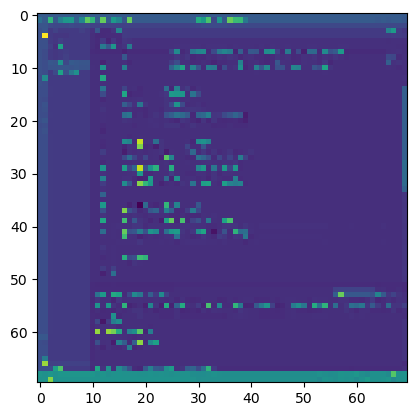

Image number :  1254
1/1 [==============================] - 0s 98ms/step
education


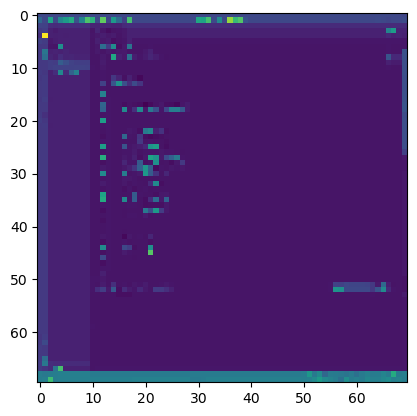

Image number :  764
1/1 [==============================] - 0s 73ms/step
sports


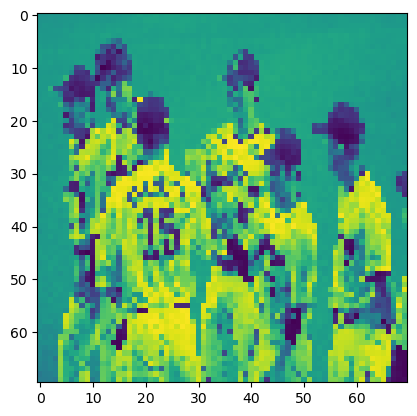

Image number :  622
1/1 [==============================] - 0s 72ms/step
Chatting


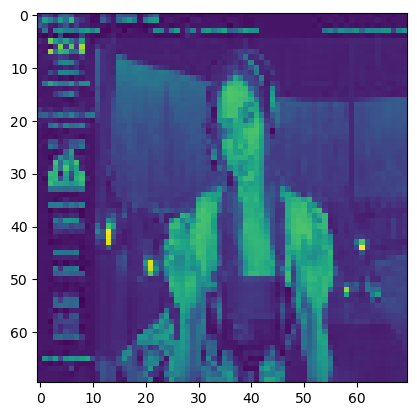

Image number :  1473
1/1 [==============================] - 0s 81ms/step
education


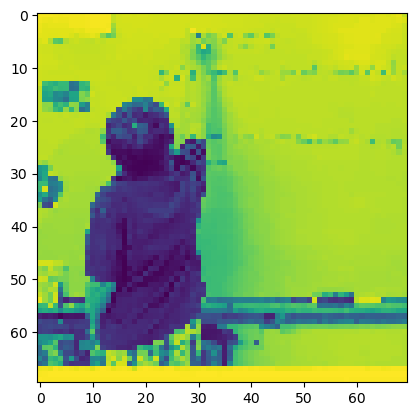

Image number :  710
1/1 [==============================] - 0s 82ms/step
sports


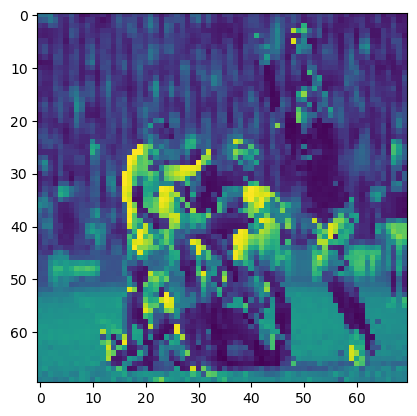

Image number :  1111
1/1 [==============================] - 0s 82ms/step
cooking


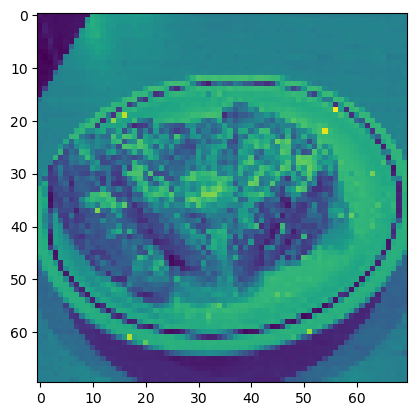

Image number :  1744
1/1 [==============================] - 0s 81ms/step
art


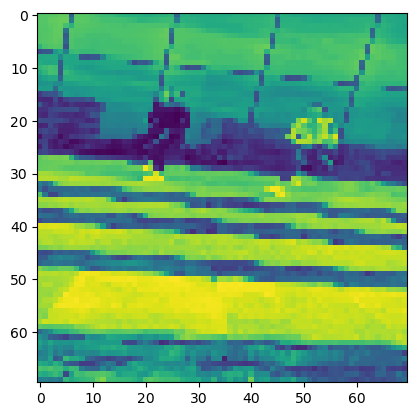

In [133]:
import random 
def predict(i):
    pre_img = i
    print('Image number : ',pre_img)
    
    print(rev_labels[np.argmax(model.predict([x_test[pre_img :pre_img+1]]))])
    plt.imshow(x_test[pre_img:pre_img+1].reshape(70,70))
    plt.show()
for i in range(10):
    predict(i+random.randint(0,x_test.shape[0]))

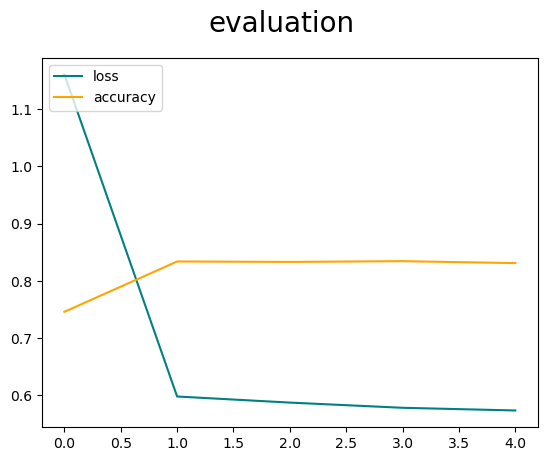

In [147]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['accuracy'], color='orange', label='accuracy')
fig.suptitle('evaluation', fontsize=20)
plt.legend(loc="upper left")
plt.show()

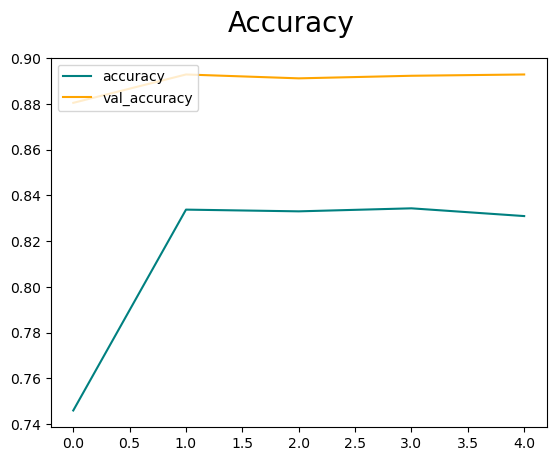

In [148]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [149]:
from tensorflow.keras.models import load_model
model.save(os.path.join('classifier.h5'))